# Fashion MNIST data analysis and modelling using CNN and Transfer Learning

## 1. Data Preparation
Ensure you have the Fashion-MNIST dataset loaded. You can use TensorFlow or PyTorch for this purpose.



In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a channel dimension (grayscale image has 1 channel)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]


4422102/4422102 [==============================] - 0s 0us/step


In [32]:
# # # Convert the first five images and labels to a DataFrame for display
# # data = {
# #     'Image': [train_images[i].squeeze() for i in range(5)],
# #     'Label': [train_labels[i] for i in range(5)]
# # }

# # # Create a DataFrame
# # df = pd.DataFrame(data)

# # # Display the DataFrame
# # print(df)
# # Convert the first five images and labels to a DataFrame for display
# data = {
#     'Image': [train_images[i].numpy().squeeze() for i in range(5)],
#     'Label': [train_labels[i] for i in range(5)]
# }

# # Create a DataFrame
# df = pd.DataFrame(data)

# # Display the DataFrame
# print(df)
import pandas as pd
# Convert the first five images and labels to a DataFrame for display
data = {
    'Image': [train_images[i].numpy().squeeze() for i in range(5)],
    'Label': [train_labels[i] for i in range(5)]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                                               Image  Label
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      9
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0


In [33]:
df.head()

,Image,Label
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0


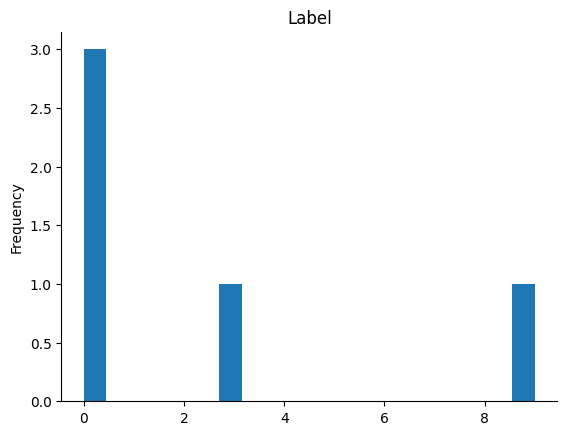

In [34]:
# @title Label

from matplotlib import pyplot as plt
df['Label'].plot(kind='hist', bins=20, title='Label')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Some random Samples

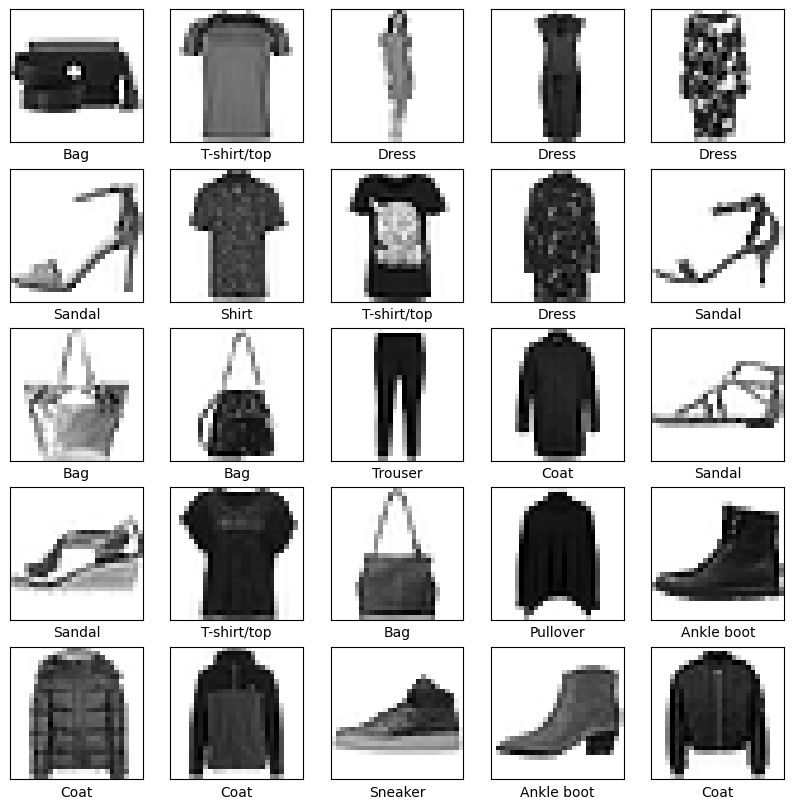

In [2]:
# Class names for Fashion-MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to plot images in a grid
def plot_images(images, labels, class_names, num_images=25):
    plt.figure(figsize=(10, 10))
    indices = np.random.choice(len(images), num_images, replace=False)
    for i, index in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[index], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[index]])
    plt.show()

# Visualize random samples from the training dataset
plot_images(train_images.squeeze(), train_labels, class_names)

In [3]:
train_images.shape

(60000, 28, 28, 1)

In [4]:
test_images.shape

(10000, 28, 28, 1)

In [5]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Information about training and testing Images

In [6]:
test_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [7]:
print(train_images.shape[0])
print("Train samples")

60000
Train samples


In [8]:
print(test_images.shape[0])
print("Test samples")

10000
Test samples


In [9]:
print("shape of images:")
train_images.shape[1],train_images.shape[2],train_images.shape[3]

shape of images:


(28, 28, 1)

## CNN
Using Convolutional Neural Networks (CNNs)


In [10]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Model fitting

In [11]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 12s 5ms/step - loss: 0.5224 - accuracy: 0.8071 - val_loss: 0.3721 - val_accuracy: 0.8643
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3351 - accuracy: 0.8774 - val_loss: 0.3267 - val_accuracy: 0.8797
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2881 - accuracy: 0.8943 - val_loss: 0.2981 - val_accuracy: 0.8900
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2550 - accuracy: 0.9067 - val_loss: 0.2748 - val_accuracy: 0.8995
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2315 - accuracy: 0.9143 - val_loss: 0.2768 - val_accuracy: 0.8947
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2107 - accuracy: 0.9222 - val_loss: 0.2665 - val_accuracy: 0.9047
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1934 - accuracy: 0.9281 - val_loss: 0.2537 - val_accuracy

## Evaluation

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 1s - loss: 0.3048 - accuracy: 0.9021 - 954ms/epoch - 3ms/step
Test accuracy: 0.9021000266075134


## Confusion Matrix

313/313 [==============================] - 1s 2ms/step


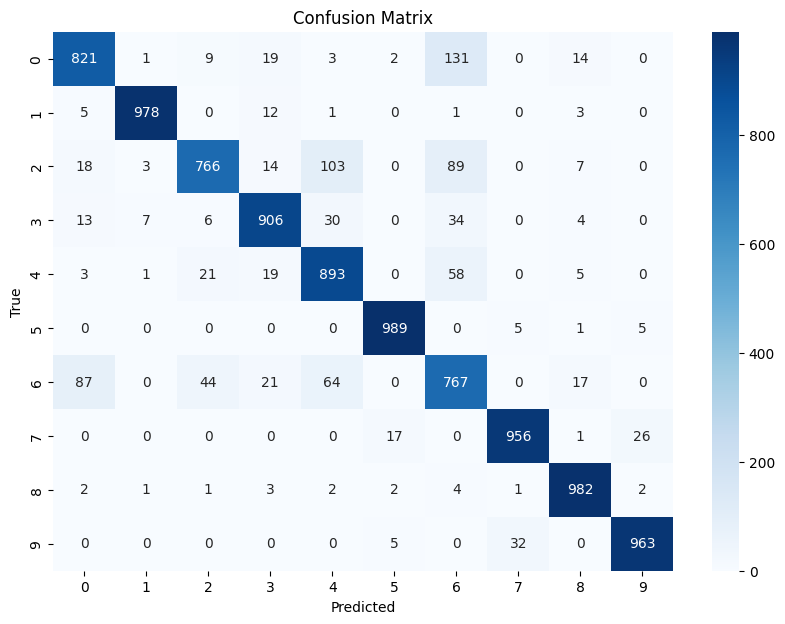

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Plotting training & validation accuracy values

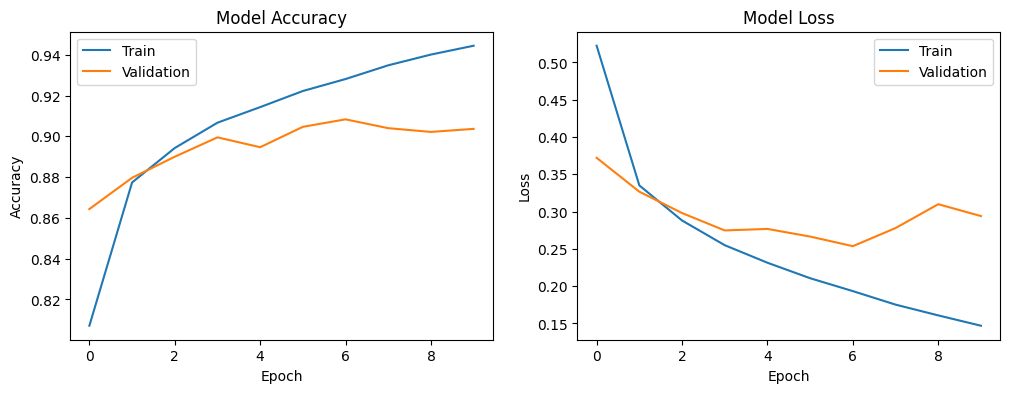

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


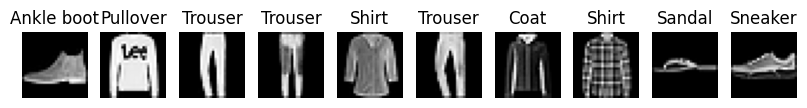

In [15]:
import matplotlib.pyplot as plt

def plot_sample_images(images, labels, class_names, num_samples=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

# Load class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plot_sample_images(test_images, test_labels, class_names)


313/313 [==============================] - 1s 2ms/step


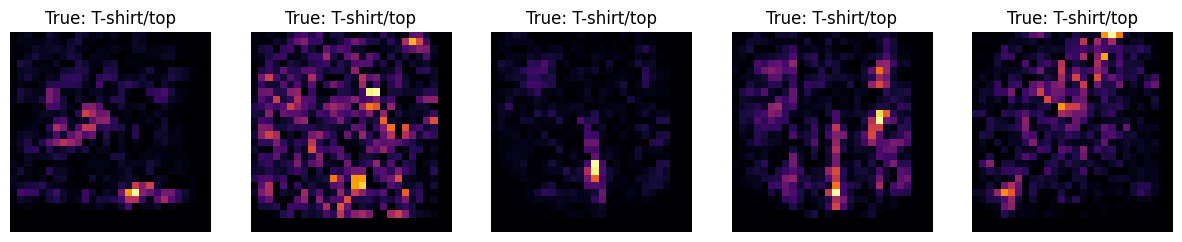

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def generate_saliency_map(model, image, class_index):
    # Ensure the image is in the right format
    image = tf.convert_to_tensor(image[tf.newaxis, ...], dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(image)
        predictions = model(image, training=False)
        loss = predictions[0, class_index]

    grads = tape.gradient(loss, image)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1).numpy()[0]
    return saliency

def plot_saliency_maps(images, true_labels, model, class_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        image = images[i]
        true_label = np.argmax(true_labels[i])
        saliency = generate_saliency_map(model, image, true_label)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(saliency, cmap='inferno')
        plt.title(f"True: {class_names[true_label]}")
        plt.axis('off')
    plt.show()

# Make predictions to get the class indices
predictions = model.predict(test_images)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot saliency maps
plot_saliency_maps(test_images, test_labels, model, class_names, num_samples=5)


### Model Summary

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## Transfer Learning

In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Load Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

applying transfer learning to the Fashion-MNIST dataset, you can use a pre-trained model like MobileNetV2, which has been trained on a large dataset (ImageNet) and fine-tune it for the Fashion-MNIST dataset

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Load Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a channel dimension (grayscale image has 1 channel)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

### Resize images to fit the pre-trained model

In [23]:

# Resize images to fit the pre-trained model
train_images = tf.image.resize(train_images, [96, 96])
test_images = tf.image.resize(test_images, [96, 96])

# Define the input layer for grayscale images
input_layer = Input(shape=(96, 96, 1))


### Load pre-trained MobileNetV2

In [24]:
# Load pre-trained MobileNetV2 model and exclude the top layers
base_model = MobileNetV2(input_shape=(96, 96, 3),
                         include_top=False,
                         weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


### Convert the single channel to 3 channels to match the expected input shape

In [25]:
# Convert grayscale input to 3-channel by using a Conv2D layer
x = Conv2D(3, (3, 3), padding='same', activation='relu')(input_layer)




#### Adding custom layers on top of the base model

In [26]:
# Freeze the base model
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=input_layer, outputs=predictions)

#### Compiling and fit the model

In [27]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 62s 30ms/step - loss: 0.5595 - accuracy: 0.8007 - val_loss: 0.3504 - val_accuracy: 0.8666
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.4312 - accuracy: 0.8422 - val_loss: 0.3203 - val_accuracy: 0.8819
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3866 - accuracy: 0.8595 - val_loss: 0.3002 - val_accuracy: 0.8932
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3706 - accuracy: 0.8646 - val_loss: 0.3144 - val_accuracy: 0.8877
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3512 - accuracy: 0.8702 - val_loss: 0.3079 - val_accuracy: 0.8954
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3350 - accuracy: 0.8777 - val_loss: 0.2936 - val_accuracy: 0.9008
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3221 - accuracy: 0.8824 - val_loss: 0.3013 -

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 3)         30        
                                                                 
 mobilenetv2_1.00_96 (Funct  (None, 3, 3, 1280)        2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 11520)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1474688   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                             

### Evaluate the Model

In [28]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy:.4f}')


313/313 [==============================] - 4s 12ms/step - loss: 0.2887 - accuracy: 0.9031
Test accuracy: 0.9031
